In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import coordinate_transforms
import decorr_calculations

In [2]:
def make_polar_contour_plot(
    plot_vals,
    az_vals,  # Units radians
    za_vals,  # Units degrees
    vmin=-1,
    vmax=1,
    ncontours=100,
    title="",
    show=True,
):
    #use_cmap = matplotlib.cm.get_cmap("inferno").copy()
    use_cmap = matplotlib.colormaps["inferno"]
    use_cmap.set_bad(color="whitesmoke")

    # Set contour levels
    levels = np.linspace(vmin, vmax, num=ncontours)

    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        subplot_kw=dict(projection="polar"),
        figsize=(9, 6),
    )
    contourplot = ax.contourf(
        az_vals,
        za_vals,
        plot_vals,
        levels,
        vmin=vmin,
        vmax=vmax,
        cmap=use_cmap,
    )
    contourplot.set_clim(vmin=vmin, vmax=vmax)
    fig.colorbar(contourplot, ax=ax, label="Decorrelation %")
    # ax[pol].set_title(f"Pol {feed_names[pol]}")
    fig.suptitle(title)
    fig.tight_layout()
    if show:
        plt.show()

In [3]:
print(np.arange(-(float(2) - 1) / 2, (float(2) - 1) / 2 + 1, 1))

[-0.5  0.5]


In [4]:
freq_resolution_hz = 130e3
time_resolution_s = 1.5
max_bl_length_m = 15e3
freq_hz = 250e6

In [5]:
source_zas = np.linspace(0, np.pi/2, 100)
decorr_values_15km = decorr_calculations.freq_decorrelation(
    freq_resolution_hz, 15000, source_za=source_zas
)
decorr_values_7km = decorr_calculations.freq_decorrelation(
    freq_resolution_hz, 7000, source_za=source_zas
)

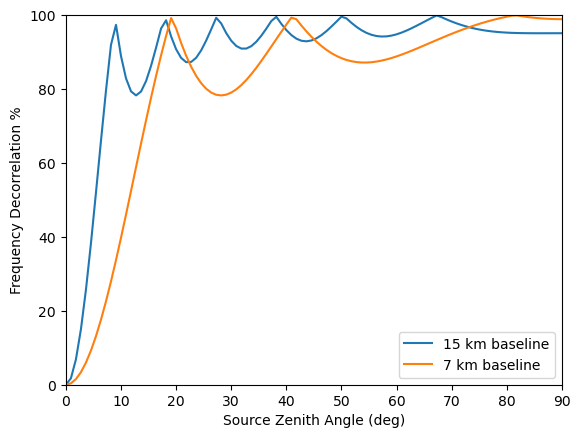

In [6]:
plt.plot(source_zas / np.pi * 180, decorr_values_15km * 100, label="15 km baseline")
plt.plot(source_zas / np.pi * 180, decorr_values_7km * 100, label="7 km baseline")
plt.xlim(0, 90)
plt.ylim(0, 100)
plt.xlabel("Source Zenith Angle (deg)")
plt.ylabel("Frequency Decorrelation %")
plt.legend()
plt.show()

In [7]:
source_ra_offset_list = np.linspace(-6, 6, num=200)
source_dec_deg_list = np.linspace(39.25 - 90, 90, num=200)
source_ra_offset_hrs, source_dec_degs = np.meshgrid(source_ra_offset_list, source_dec_deg_list)

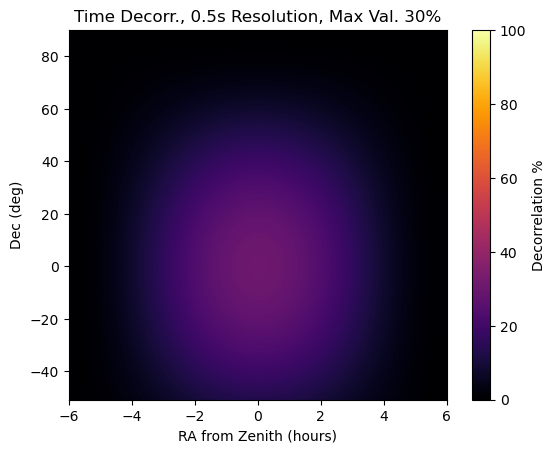

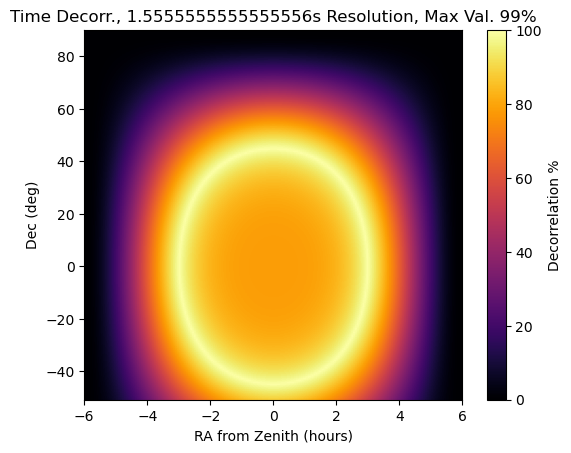

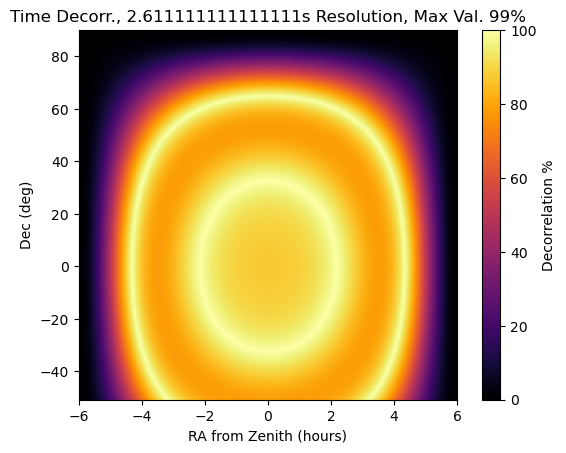

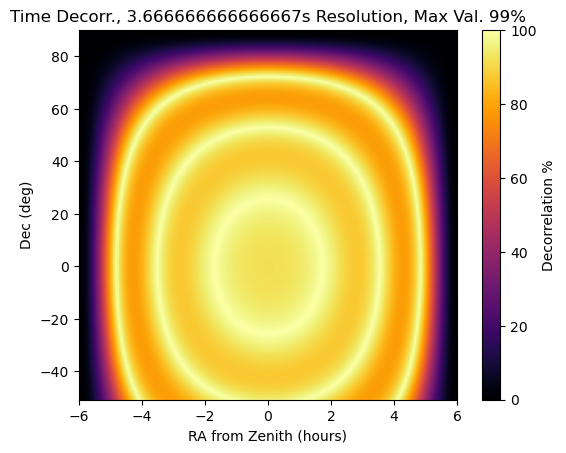

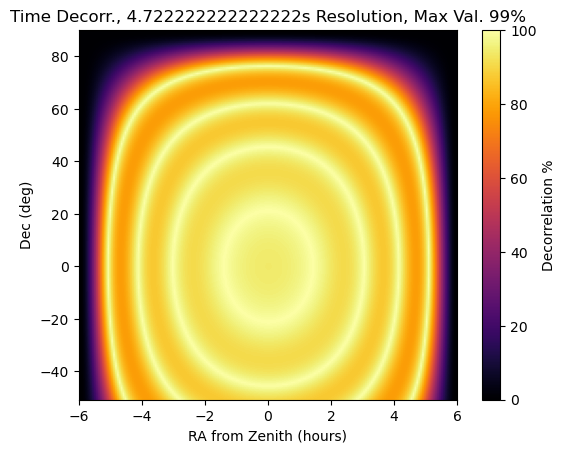

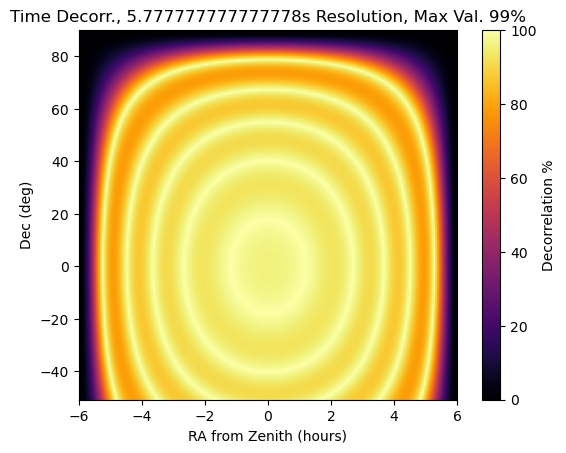

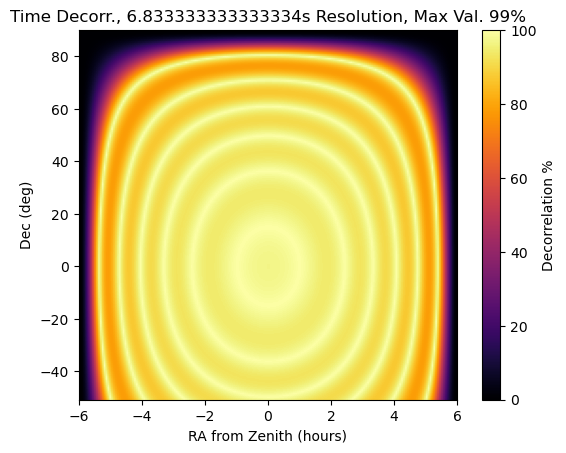

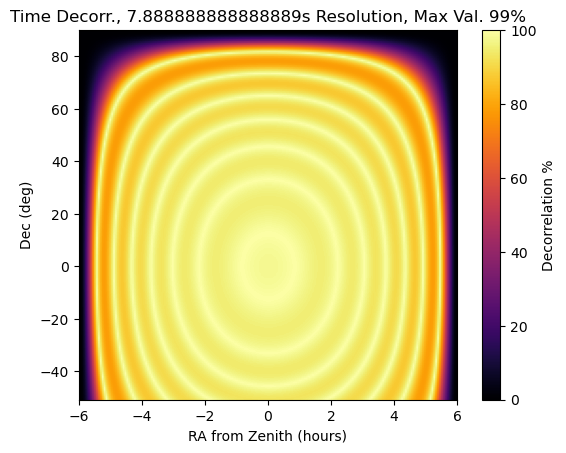

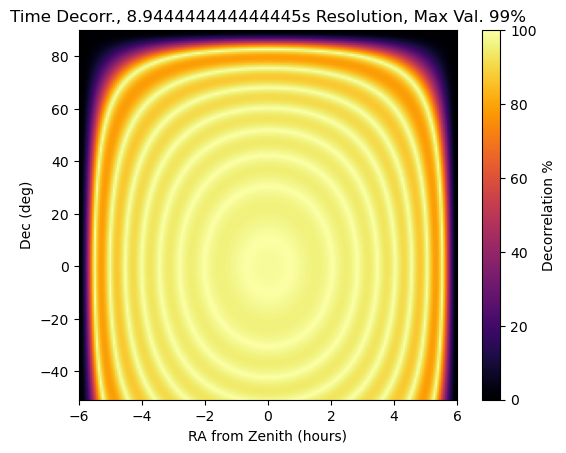

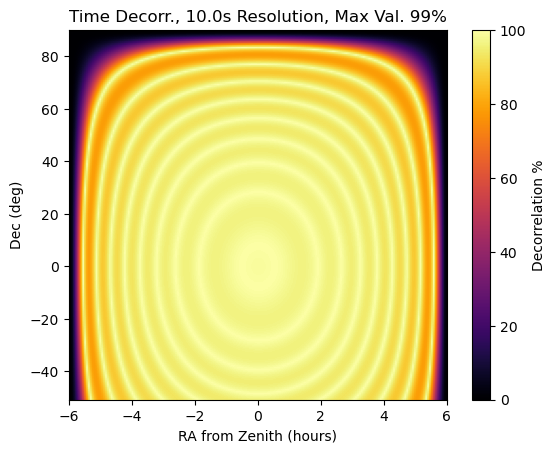

In [8]:
for use_time_resolution_s in np.linspace(0.5, 10, num=10):

    decorr_values = decorr_calculations.time_decorrelation(
        use_time_resolution_s,
        freq_hz,
        15e3,
        0,
        source_ra_offset_hrs,  # Difference between zenith and source RAs
        source_dec_degs,  # Difference between zenith and source RAs
        telescope_lat_deg=39.25,
        omega=7.27e-5,
        c=3e8,
    )

    plt.imshow(
        decorr_values*100,
        origin="lower",
        cmap="inferno",
        interpolation=None,
        extent=(
            np.min(source_ra_offset_list),
            np.max(source_ra_offset_list),
            np.min(source_dec_deg_list),
            np.max(source_dec_deg_list),
        ),
        vmin=0,
        vmax=100,
        aspect=1/12,
    )
    plt.xlabel("RA from Zenith (hours)")
    plt.ylabel("Dec (deg)")
    plt.colorbar(label="Decorrelation %")
    plt.title(
        f"Time Decorr., {use_time_resolution_s}s Resolution, Max Val. {int(np.max(decorr_values*100))}%"
    )
    plt.show()
    #plt.savefig(f"/Users/ruby/Downloads/time_decorr_{use_time_resolution_s}s.png",dpi=300)
    #plt.close()

In [9]:
print(np.max(decorr_values))

0.999991768083603


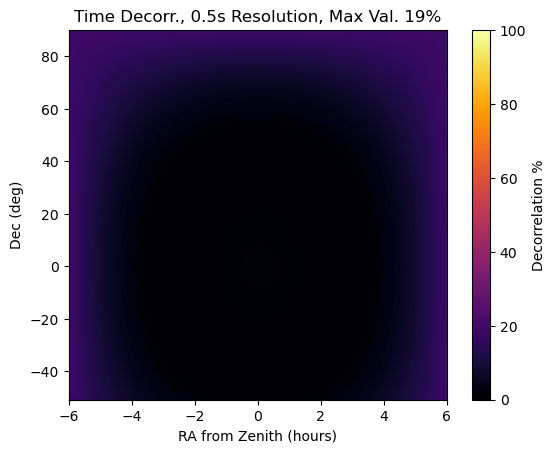

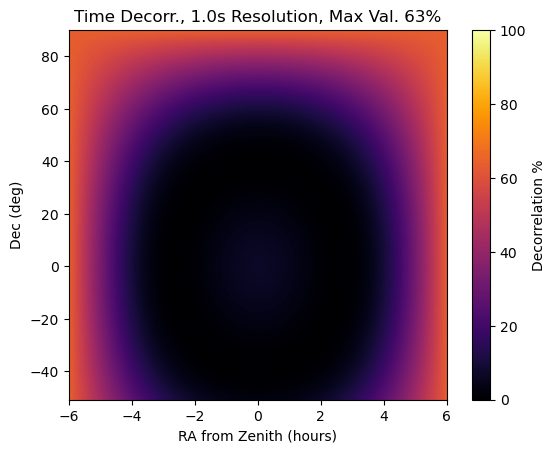

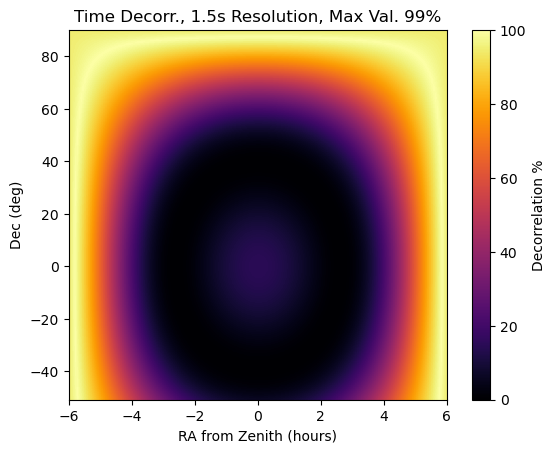

In [10]:
for use_time_resolution_s in np.linspace(0.5, 1.5, num=3):

    decorr_values = decorr_calculations.time_decorrelation_with_continuous_phase_tracking(
        use_time_resolution_s,
        freq_hz,
        15e3,
        0,
        source_ra_offset_hrs,  # Difference between zenith and source RAs
        source_dec_degs,  # Difference between zenith and source RAs
        telescope_lat_deg=39.25,
        omega=7.27e-5,
        c=3e8,
    )

    plt.imshow(
        decorr_values * 100,
        origin="lower",
        cmap="inferno",
        interpolation=None,
        extent=(
            np.min(source_ra_offset_list),
            np.max(source_ra_offset_list),
            np.min(source_dec_deg_list),
            np.max(source_dec_deg_list),
        ),
        vmin=0,
        vmax=100,
        aspect=1 / 12,
    )
    plt.xlabel("RA from Zenith (hours)")
    plt.ylabel("Dec (deg)")
    plt.colorbar(label="Decorrelation %")
    plt.title(
        f"Time Decorr., {use_time_resolution_s}s Resolution, Max Val. {int(np.max(decorr_values*100))}%"
    )
    plt.show()
    # plt.savefig(f"/Users/ruby/Downloads/time_decorr_{use_time_resolution_s}s.png",dpi=300)
    # plt.close()

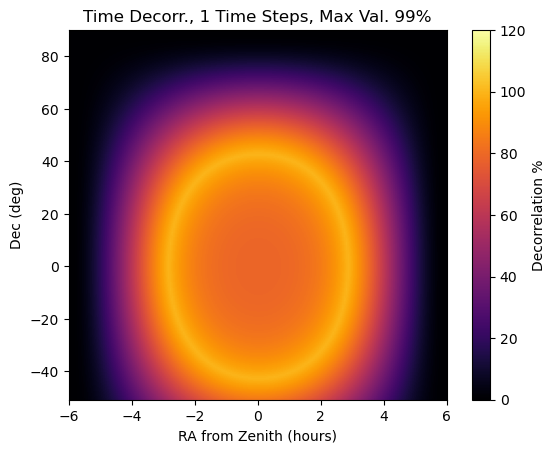

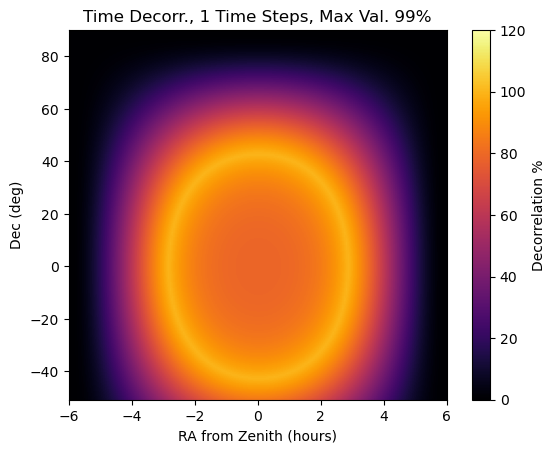

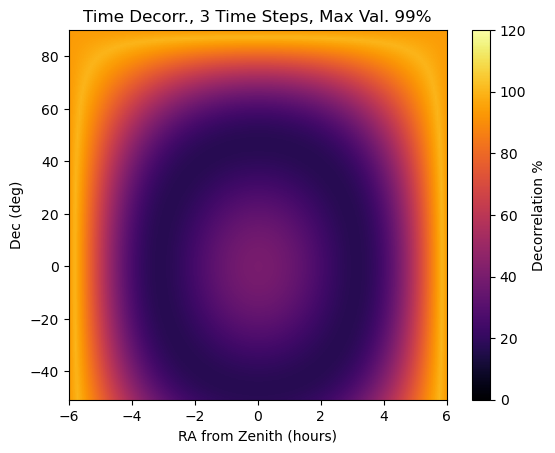

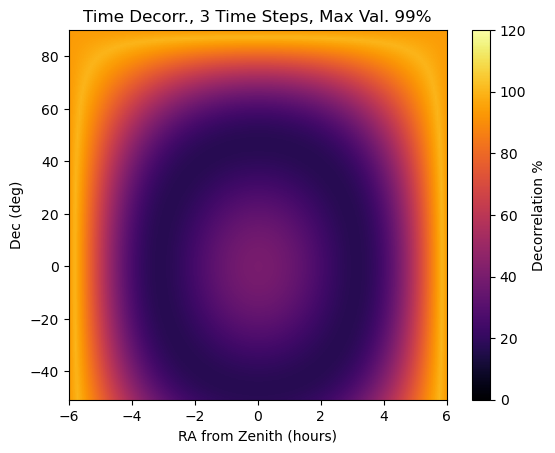

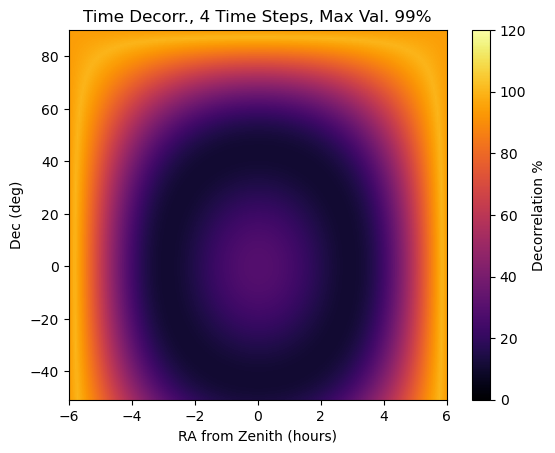

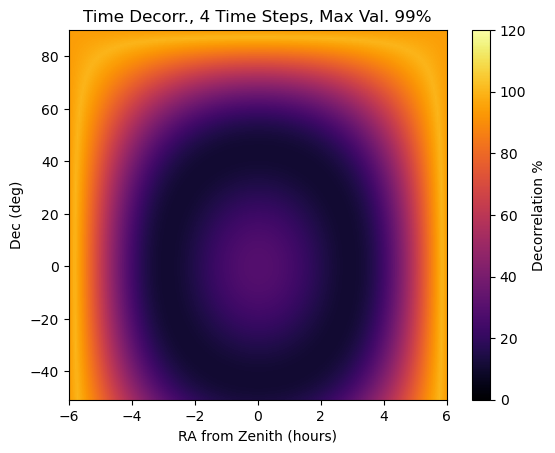

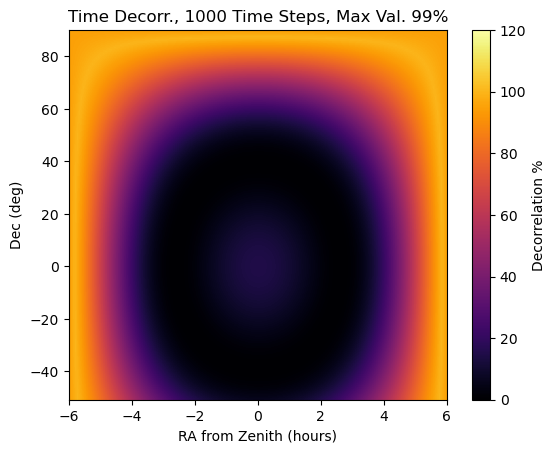

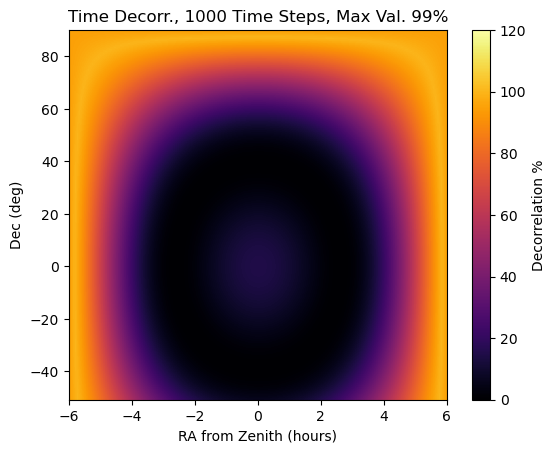

In [18]:
total_time_interval_s = 1.5
for n_time_steps in [1, 3, 4, 1000]:
    decorr_values = decorr_calculations.time_decorrelation_with_discrete_phase_tracking(
        total_time_interval_s,
        n_time_steps,
        freq_hz,
        15e3,
        0,
        source_ra_offset_hrs,  # Difference between zenith and source RAs
        source_dec_degs,  # Difference between zenith and source RAs
        telescope_lat_deg=39.25,
        omega=7.27e-5,
        c=3e8,
    )

    plt.imshow(
        decorr_values * 100,
        origin="lower",
        cmap="inferno",
        interpolation=None,
        extent=(
            np.min(source_ra_offset_list),
            np.max(source_ra_offset_list),
            np.min(source_dec_deg_list),
            np.max(source_dec_deg_list),
        ),
        vmin=0,
        vmax=120,
        aspect=1 / 12,
    )
    plt.xlabel("RA from Zenith (hours)")
    plt.ylabel("Dec (deg)")
    plt.colorbar(label="Decorrelation %")
    plt.title(
        f"Time Decorr., {n_time_steps} Time Steps, Max Val. {int(np.max(decorr_values*100))}%"
    )
    plt.show()

    decorr_values = decorr_calculations.time_decorrelation_with_discrete_phase_tracking_to_zenith(
        total_time_interval_s,
        n_time_steps,
        freq_hz,
        15e3,
        0,
        source_ra_offset_hrs,  # Difference between zenith and source RAs
        source_dec_degs,  # Difference between zenith and source RAs
        telescope_lat_deg=39.25,
        omega=7.27e-5,
        c=3e8,
    )

    plt.imshow(
        decorr_values * 100,
        origin="lower",
        cmap="inferno",
        interpolation=None,
        extent=(
            np.min(source_ra_offset_list),
            np.max(source_ra_offset_list),
            np.min(source_dec_deg_list),
            np.max(source_dec_deg_list),
        ),
        vmin=0,
        vmax=120,
        aspect=1 / 12,
    )
    plt.xlabel("RA from Zenith (hours)")
    plt.ylabel("Dec (deg)")
    plt.colorbar(label="Decorrelation %")
    plt.title(
        f"Time Decorr., {n_time_steps} Time Steps, Max Val. {int(np.max(decorr_values*100))}%"
    )
    plt.show()

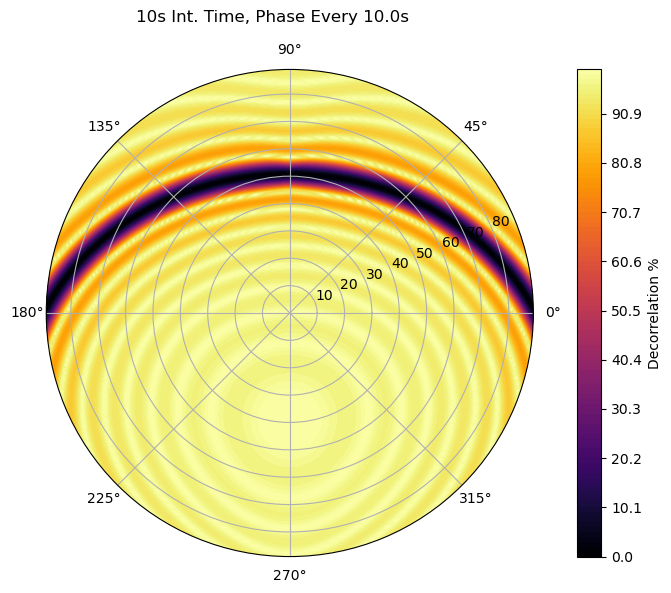

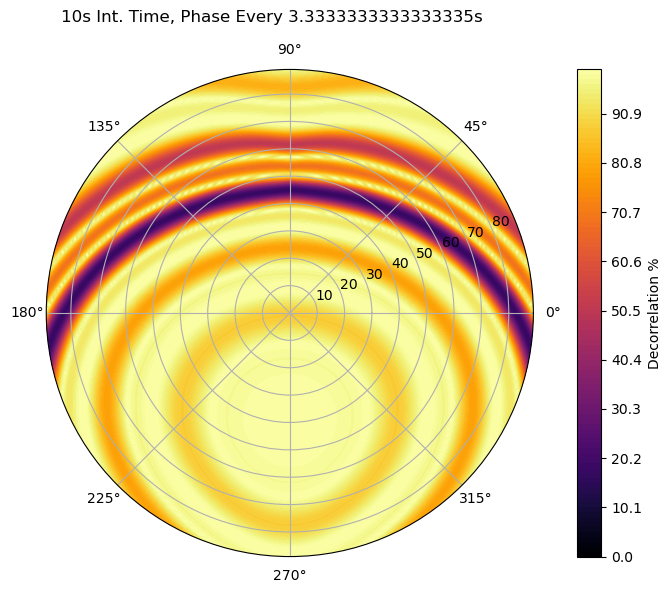

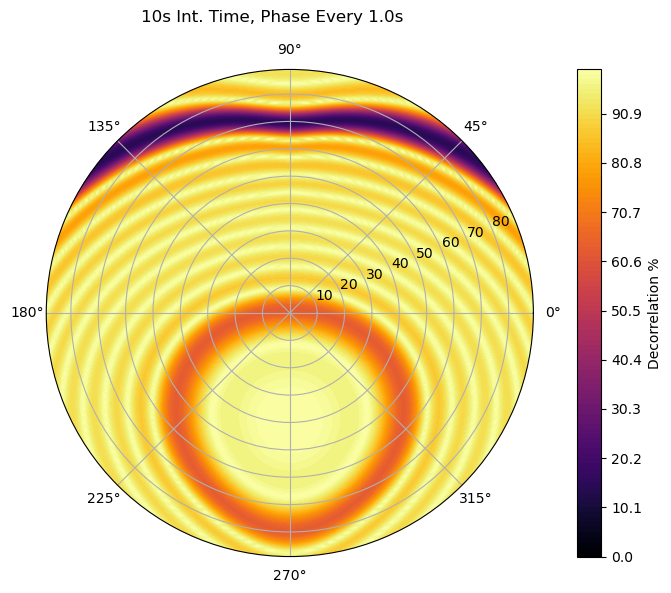

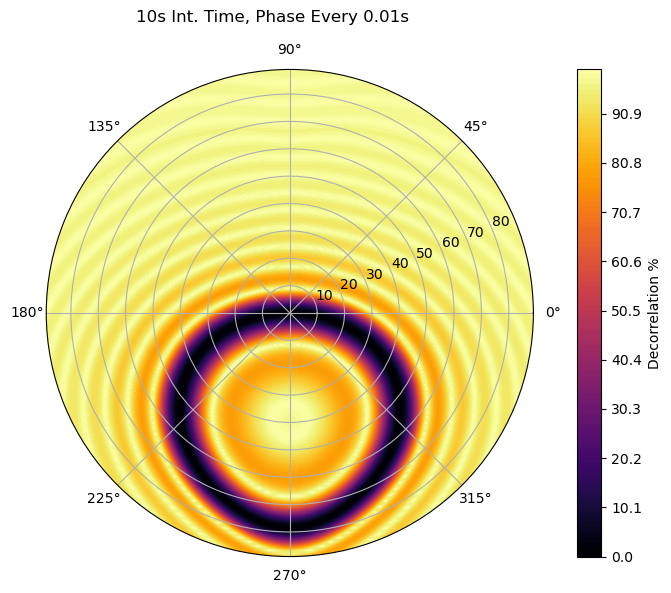

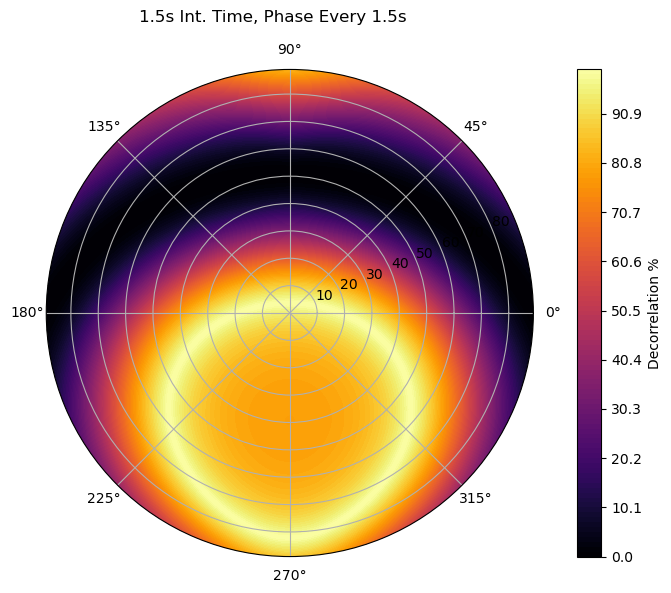

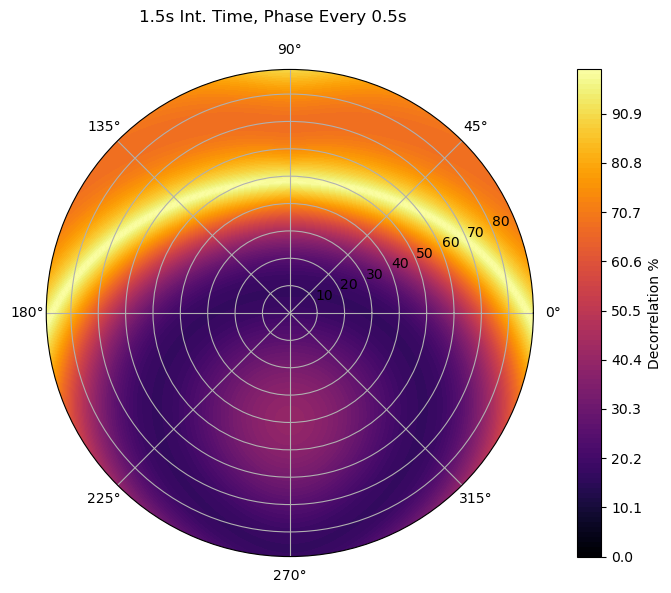

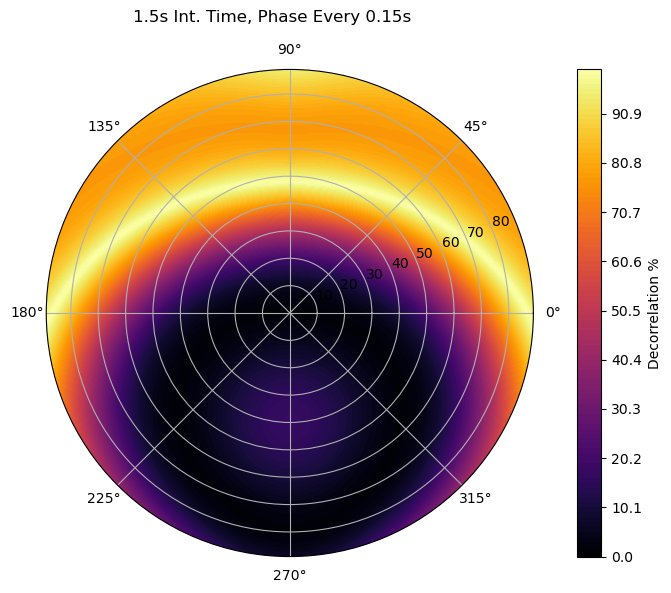

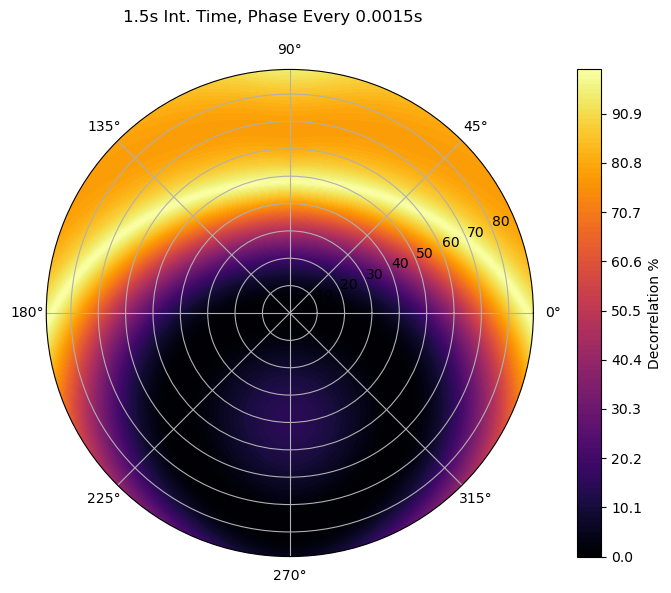

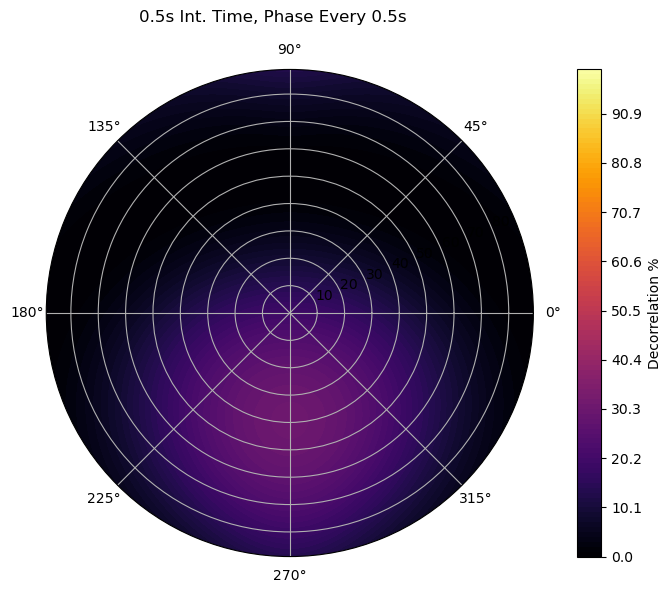

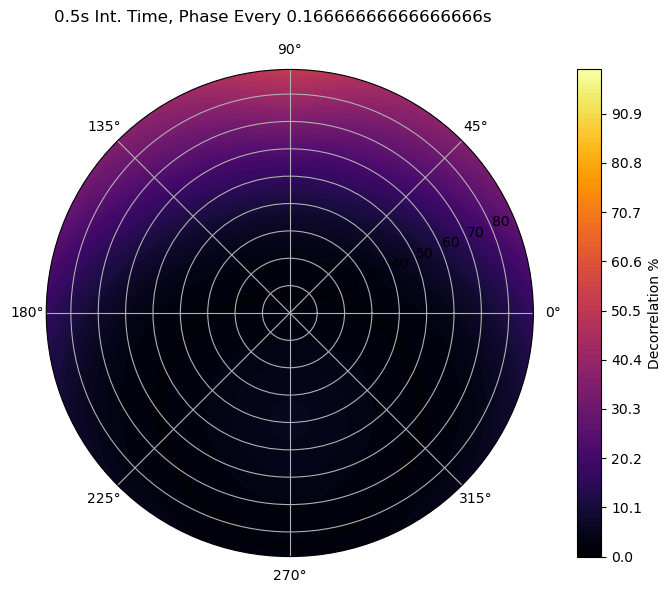

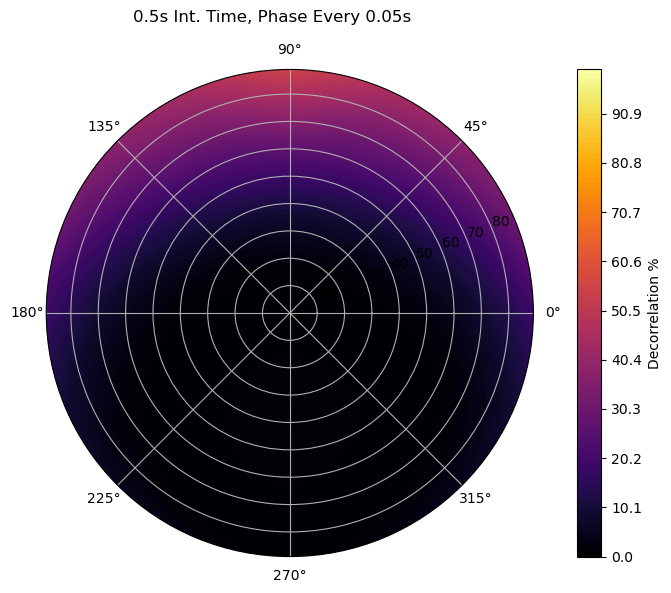

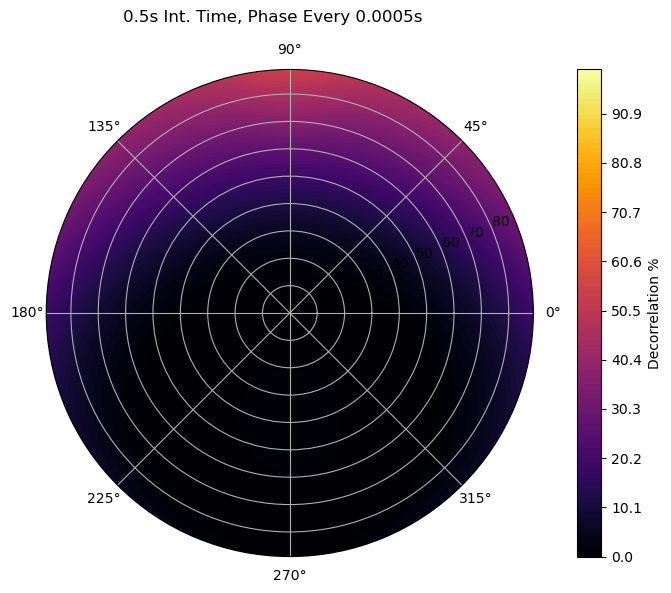

In [12]:
za_vals = np.arange(0, 90, 1)
az_vals = np.arange(0, 370, 1)
az_array, za_array = np.meshgrid(az_vals, za_vals)
telescope_lat = 39.25
# telescope_lat = 90
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours
    telescope_lat,  # Units degrees
)

for int_time in [10, 1.5, 0.5]:
    for time_steps in [1, 3, 10, 1000]:

        decorr_values = decorr_calculations.time_decorrelation_with_discrete_phase_tracking(
            int_time,
            time_steps,
            freq_hz,
            15e3,
            0,
            ra_vals,
            dec_vals,
            telescope_lat_deg=telescope_lat,
            omega=7.27e-5,
            c=3e8,
        )
        make_polar_contour_plot(
            decorr_values * 100,
            np.deg2rad(az_vals),  # Units radians
            za_vals,  # Units degrees
            vmin=0,
            vmax=100,
            ncontours=100,
            title=f"{int_time}s Int. Time, Phase Every {int_time/time_steps}s",
        )

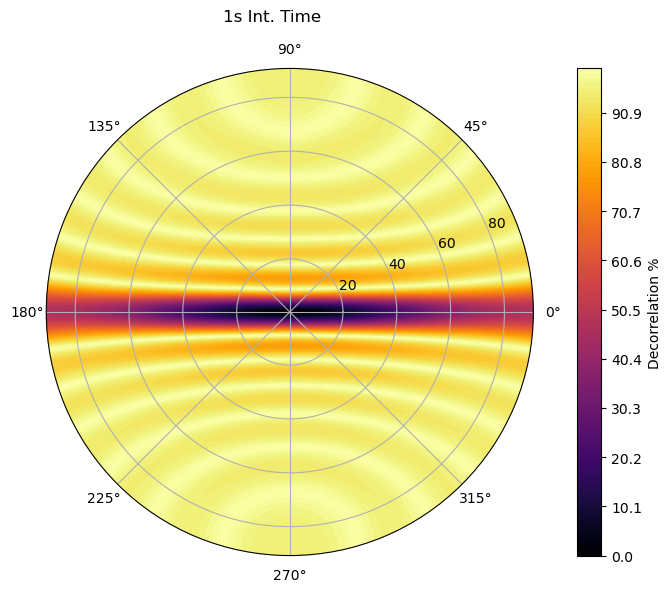

In [13]:
za_vals = np.arange(0, 91, .5) + .25  # Offset to avoid discontinuities
az_vals = np.arange(0, 370, 0.5) + 0.25  # Offset to avoid discontinuities
az_array, za_array = np.meshgrid(az_vals, za_vals)
telescope_lat = 39.25
# telescope_lat = 90
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours
    telescope_lat,  # Units degrees
)

freq_resolution_hz = 130e3
for int_time in [1]:
    decorr_values = decorr_calculations.time_and_freq_decorrelation(
        int_time,
        freq_resolution_hz,  # freq_resolution_hz,
        freq_hz,
        0,
        15000,
        ra_vals,
        dec_vals,
        telescope_lat_deg=39.25,
        c=3e8,
    )
    plot_values = np.abs(decorr_values) * 100
    make_polar_contour_plot(
        plot_values,
        np.deg2rad(az_vals),  # Units radians
        za_vals,  # Units degrees
        vmin=0,
        vmax=100,
        ncontours=100,
        title=f"{int_time}s Int. Time",
    )

In [14]:
scipy.special.sici(-1+1j*0)

((-0.946083070367183-0j), (0.33740392290096816+3.141592653589793j))

In [15]:
import ipywidgets as widgets
from ipywidgets import interactive


# Define interactive plot function
def interactive_plot(int_time, time_steps, bl_length, bl_orientation):
    # Using predefined frequency and baseline extent values for demonstration
    bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
    bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

    za_vals = np.arange(0, 90, 1)
    az_vals = np.arange(0, 370, 1)
    az_array, za_array = np.meshgrid(az_vals, za_vals)
    telescope_lat = 39.25
    ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
        az_array,  # Units degrees
        za_array,  # Units degrees
        0,  # Units hours (RA of zenith)
        telescope_lat,  # Units degrees
    )

    # Calculate the time decorrelation values based on current slider values
    decorr_values = decorr_calculations.time_decorrelation_with_discrete_phase_tracking(
        int_time,
        time_steps,
        freq_hz,
        bl_ew_extent_m,
        bl_ns_extent_m,
        ra_vals,
        dec_vals,
        telescope_lat_deg=telescope_lat,
        omega=7.27e-5,
        c=3e8,
    )

    # Plot using the updated values
    make_polar_contour_plot(
        decorr_values * 100,  # Convert to percentage
        np.deg2rad(az_vals),  # Units radians
        za_vals,  # Units degrees
        vmin=0,
        vmax=100,
        ncontours=100,
        title=f"{round(int_time, 2)}s Int. Time, Phase Every {round(int_time/time_steps, 2)}s",
        show=False,
    )


# Create sliders for interactive control
int_time_slider = widgets.FloatSlider(
    value=1.5,  # Initial value
    min=0.01,  # Minimum value
    max=1.5,  # Maximum value
    step=0.01,  # Step size
    description="Int. Time (s):",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

time_steps_slider = widgets.IntSlider(
    value=1,  # Initial value
    min=1,  # Minimum value
    max=20,  # Maximum value
    step=1,  # Step size
    description="Time Steps:",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

bl_length_slider = widgets.IntSlider(
    value=15000,  # Initial value
    min=0,  # Minimum value
    max=20000,  # Maximum value
    step=1,  # Step size
    description="BL length:",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

bl_orientation_slider = widgets.IntSlider(
    value=0,  # Initial value
    min=0,  # Minimum value
    max=180,  # Maximum value
    step=1,  # Step size
    description="BL orientation (deg.):",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

# Use interactive to update the plot when sliders are changed
interactive_plot_func = interactive(
    interactive_plot,
    int_time=int_time_slider,
    time_steps=time_steps_slider,
    bl_length=bl_length_slider,
    bl_orientation=bl_orientation_slider,
)
output = interactive_plot_func.children[-1]
output.layout.height = "600px"

# Display the interactive plot
display(interactive_plot_func)

interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='Int. Time (s):', layout=Lay…

In [16]:
from IPython.display import display, HTML

# Define interactive plot function
def interactive_plot(time_resolution_s, freq_resolution_hz, bl_length, bl_orientation):
    # Using predefined frequency and baseline extent values for demonstration
    bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
    bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

    za_vals = np.arange(0, 90, 1) + 0.5
    az_vals = np.arange(0, 370, 1) + 0.5
    az_array, za_array = np.meshgrid(az_vals, za_vals)
    telescope_lat = 39.25
    ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
        az_array,  # Units degrees
        za_array,  # Units degrees
        0,  # Units hours (RA of zenith)
        telescope_lat,  # Units degrees
    )

    # Calculate the time decorrelation values based on current slider values
    decorr_values = decorr_calculations.time_and_freq_decorrelation(
        time_resolution_s,
        freq_resolution_hz,
        freq_hz,
        bl_ew_extent_m,
        bl_ns_extent_m,
        ra_vals,
        dec_vals,
        telescope_lat_deg=telescope_lat,
        c=3e8,
    )

    # Plot using the updated values
    make_polar_contour_plot(
        decorr_values * 100,  # Convert to percentage
        np.deg2rad(az_vals),  # Units radians
        za_vals,  # Units degrees
        vmin=0,
        vmax=100,
        ncontours=100,
        title=f"{round(int_time, 2)}s Int. Time, Phase Every {round(int_time/time_steps, 2)}s",
        show=False,
    )


# Create sliders for interactive control
int_time_slider = widgets.FloatSlider(
    value=1.5,  # Initial value
    min=0.01,  # Minimum value
    max=1.5,  # Maximum value
    step=0.01,  # Step size
    description="Int. Time (s):",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

freq_resolution_slider = widgets.IntSlider(
    value=130e3,  # Initial value
    min=1e3,  # Minimum value
    max=200e3,  # Maximum value
    step=100,  # Step size
    description="Freq. Res. (Hz)",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

bl_length_slider = widgets.IntSlider(
    value=15000,  # Initial value
    min=0,  # Minimum value
    max=20000,  # Maximum value
    step=1,  # Step size
    description="BL length:",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

bl_orientation_slider = widgets.IntSlider(
    value=0,  # Initial value
    min=0,  # Minimum value
    max=180,  # Maximum value
    step=1,  # Step size
    description="BL orientation (deg.):",
    continuous_update=False,
    layout=widgets.Layout(width="auto", min_width="10px"),
)

# Inject CSS to ensure label has minimum width
display(
    HTML(
        """
<style>
.widget-label {
    min-width: 200px !important; /* Adjust this value as needed */
    display: flex; /* Ensure label takes full available width */
    align-items: center; /* Vertically align label text */
}
.widget-box.hbox > .widget-label {
    flex: 0 0 auto; /* Prevent label from stretching in hbox */
    padding-right: 10px; /* Add some spacing between label and slider */
}
</style>
"""
    )
)

# Use interactive to update the plot when sliders are changed
interactive_plot_func = interactive(
    interactive_plot,
    time_resolution_s=int_time_slider,
    freq_resolution_hz=freq_resolution_slider,
    bl_length=bl_length_slider,
    bl_orientation=bl_orientation_slider,
)
output = interactive_plot_func.children[-1]
output.layout.height = "600px"

# Display the interactive plot
display(interactive_plot_func)

interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='Int. Time (s):', layout=Lay…